In [225]:
"""
Course: dpat4
Lab: 04
Part: 1
"""

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from contextlib import contextmanager

TIMER: dict = {}

def record(lib: str, task: str, time_used: float) -> None:
    """
    Record the elapsed time of the task using specific lib
    :param lib: the name of the lib used (numpy, pandas)
    :param task: task number (task1)
    :param time_used: time used to complete the task
    :return: None
    """
    global TIMER
    
    if lib not in TIMER:
        TIMER[lib] = {}
    TIMER[lib][task] = time_used
    

def get_indexes(dataframe: pd.DataFrame) -> None: 
    cols = {col: idx for idx, col in enumerate(dataframe.columns)}
    
    return print(cols)


@contextmanager
def timer(lib: str, task: str):
    start = time.time()
    try:
        yield
    finally:
        end = time.time()
        time_used = round(end - start, 6)
        record(lib, task, time_used)
        
        print(f'task: {task:}\nlib: {lib}\ntime used: {time_used}')



URL = "household_power_consumption.csv"

print('Setup complete...')

Setup complete...


## Task No. 0
Desc: Імпортування дата сету

In [226]:
# task: 0
# lib: pandas

with timer('pandas', 'task0'):
    pd_data = pd.read_csv(URL, sep=';', na_values='?')
    pd_data.dropna(inplace=True)

pd_data.head()

task: task0
lib: pandas
time used: 3.826996


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [227]:
# task: 0
# lib: numpy

with timer('numpy', 'task0'):
    dtypes = [
        ('Date', 'U10'), 
        ('Time', 'U8'), 
        ('Global_active_power', 'f8'), 
        ('Global_reactive_power', 'f8'), 
        ('Voltage', 'f8'), 
        ('Global_intensity', 'f8'), 
        ('Sub_metering_1', 'f8'), 
        ('Sub_metering_2', 'f8'), 
        ('Sub_metering_3', 'f8')
    ]
    
    np_data = np.genfromtxt(
        URL, 
        delimiter=';',
        missing_values='?',
        filling_values=np.nan,
        dtype=dtypes,
        encoding=None,
        names=True
    )
    
    np_columns = [col for col, _ in dtypes[2:]]
    mask = np.all([~np.isnan(np_data[col]) for col in np_columns], axis=0)

    np_data = np_data[mask]

np_data

task: task0
lib: numpy
time used: 33.116103


array([('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.),
       ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.),
       ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.),
       ...,
       ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')])

In [228]:
nan_mask = np.any([np.isnan(np_data[col]) for col in np_columns], axis=0)

nan = np_data[nan_mask]

nan

array([],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')])

## Task No. 1
Desc: Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує **5 кВт**.

In [229]:
# task: 1
# lib: pandas

with timer('pandas', 'task1'):
    pd_active_power = pd_data[
        pd_data['Global_active_power'] > 5
    ]

pd_active_power

task: task1
lib: pandas
time used: 0.111175


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
11,16/12/2006,17:35:00,5.412,0.470,232.78,23.2,0.0,1.0,17.0
12,16/12/2006,17:36:00,5.224,0.478,232.99,22.4,0.0,1.0,16.0
...,...,...,...,...,...,...,...,...,...
2069356,22/11/2010,18:40:00,5.408,0.150,231.50,23.6,48.0,0.0,0.0
2069357,22/11/2010,18:41:00,5.528,0.144,232.48,24.6,53.0,0.0,0.0
2071586,24/11/2010,07:50:00,5.172,0.050,235.18,22.0,0.0,38.0,17.0
2071587,24/11/2010,07:51:00,5.750,0.000,234.40,24.6,0.0,39.0,17.0


In [230]:
# task: 1
# lib: numpy

with timer('numpy', 'task1'):
    np_active_power = np_data[
        np_data['Global_active_power'] > 5
    ]

np_active_power

task: task1
lib: numpy
time used: 0.011155


array([('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0.,  1., 16.),
       ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0.,  2., 17.),
       ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0.,  1., 17.),
       ...,
       ('24/11/2010', '07:50:00', 5.172, 0.05 , 235.18, 22. , 0., 38., 17.),
       ('24/11/2010', '07:51:00', 5.75 , 0.   , 234.4 , 24.6, 0., 39., 17.),
       ('25/11/2010', '07:21:00', 5.074, 0.24 , 238.55, 21.4, 1.,  2., 18.)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')])

## Task No. 2
Обрати всі домогосподарства, у яких вольтаж перевищує 235 В.

In [231]:
# task: 2
# lib: pandas

with timer('pandas', 'task2'):
    pd_voltage = pd_data[
        pd_data['Voltage'] > 235
    ]

pd_voltage

task: task2
lib: pandas
time used: 0.135622


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
14,16/12/2006,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [232]:
# task: 2
# lib: numpy

with timer('numpy', 'task2'):
    np_voltage = np_data[
        np_data['Voltage'] > 235
    ]

np_voltage

task: task2
lib: numpy
time used: 0.141337


array([('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.),
       ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0., 2., 17.),
       ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0., 1., 17.),
       ...,
       ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')])

## Task No. 3
Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [233]:
# task: 3
# lib: pandas

with timer('pandas', 'task3'):
    pd_global_intensity = pd_data[
        (pd_data['Global_intensity'] >= 19) & 
        (pd_data['Global_intensity'] <= 20)
    ]
    
    pd_specific_consumption = pd_global_intensity[
        (pd_global_intensity['Sub_metering_1'] + pd_global_intensity['Sub_metering_2']) > pd_global_intensity['Sub_metering_3']
    ]


pd_specific_consumption

task: task3
lib: pandas
time used: 0.105966


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
45,16/12/2006,18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
460,17/12/2006,01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
464,17/12/2006,01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
475,17/12/2006,01:19:00,4.636,0.140,237.37,19.4,0.0,36.0,0.0
476,17/12/2006,01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...
2071589,24/11/2010,07:53:00,4.666,0.000,235.72,19.8,0.0,39.0,17.0
2071590,24/11/2010,07:54:00,4.694,0.000,236.78,19.8,0.0,39.0,18.0
2071591,24/11/2010,07:55:00,4.602,0.000,237.08,19.4,0.0,40.0,17.0
2071592,24/11/2010,07:56:00,4.536,0.000,237.03,19.0,0.0,39.0,17.0


In [234]:
# task: 3
# lib: numpy

with timer('numpy', 'task3'):
    # Global_intensity col for range >= 19 and <= 20
    current_range = np_data[
        (np_data['Global_intensity'] >= 19) & (np_data['Global_intensity'] <= 20)
    ]

    # sum of the Sub_metering groups
    sub_metering_1_2 = current_range['Sub_metering_1'] + current_range['Sub_metering_2']
    sub_metering_3 = current_range['Sub_metering_3']
    
    # getting df were sub_metering_1 + sub_metering_2 > sub_metering_3
    specific_consumption = current_range[sub_metering_1_2 > sub_metering_3]

specific_consumption

task: task3
lib: numpy
time used: 0.036217


array([('16/12/2006', '18:09:00', 4.464, 0.136, 234.66, 19. , 0., 37., 16.),
       ('17/12/2006', '01:04:00', 4.582, 0.258, 238.08, 19.6, 0., 13.,  0.),
       ('17/12/2006', '01:08:00', 4.618, 0.104, 239.61, 19.6, 0., 27.,  0.),
       ...,
       ('24/11/2010', '07:55:00', 4.602, 0.   , 237.08, 19.4, 0., 40., 17.),
       ('24/11/2010', '07:56:00', 4.536, 0.   , 237.03, 19. , 0., 39., 17.),
       ('24/11/2010', '07:57:00', 4.626, 0.   , 236.78, 19.4, 0., 39., 17.)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')])

## Task No. 4
Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки) для них обчислити середні величини усіх 3-х груп споживання електричної енергії

In [235]:
# task: 4
# lib: pandas

with timer('pandas', 'task4'):

    # random 500000 items, random_state - seed for the random generator
    pd_random_households = pd_data.sample(n=500000, random_state=1).reset_index(drop=True)
    
    pd_mean_consumption = pd_random_households[
        ['Global_active_power', 
         'Global_intensity', 
         'Voltage', 
         'Sub_metering_1', 
         'Sub_metering_2', 
         'Sub_metering_3']
    ].mean()

pd_mean_consumption

task: task4
lib: pandas
time used: 1.259214


Global_active_power      1.091403
Global_intensity         4.626928
Voltage                240.836107
Sub_metering_1           1.124120
Sub_metering_2           1.301936
Sub_metering_3           6.465210
dtype: float64

In [236]:
# task: 4
# lib: numpy

with timer('numpy', 'task4'):
    np_random_idx = np.random.choice(np_data.shape[0], 500000, replace=True)
    np_random_households = np_data[np_random_idx]
    
    mean_fields = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
    np_mean_consumption = {col: np.mean(np_random_households[col]) for col in mean_fields}

np_mean_consumption

task: task4
lib: numpy
time used: 0.412424


{'Sub_metering_1': 1.132816,
 'Sub_metering_2': 1.292338,
 'Sub_metering_3': 6.469486}

## Task No. 5 (4.1)
Desc: Обрати ті домогосподарства, які після 18-00 споживають понад **6 кВт** за годину, в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із других половин.

In [237]:
# task: 5 (4.1)
# lib: pandas

with timer('pandas', 'task5'):

    time_threshold = pd.to_datetime('18:00:00').time()
    
    pd_random_households['Time'] = pd.to_datetime(pd_random_households['Time'], format='%H:%M:%S').dt.time
    
    # 6 кВт past time_threshold
    pd_evening_consumption = pd_random_households[
        (pd_random_households['Time'] >= time_threshold) & 
        (pd_random_households['Global_active_power'] > 6)
    ]
    
    # where consumption in the group 2 is greater than 3 and 1 combined
    pd_main_consumption = pd_evening_consumption[
        pd_evening_consumption['Sub_metering_2'] > 
        pd_evening_consumption[
            ['Sub_metering_1', 'Sub_metering_3']
        ].max(axis=1)
    ]
    
    # from the first half, every third part
    pd_first_half = pd_main_consumption.iloc[:len(pd_main_consumption) // 2].iloc[::3]
    
    # from the second half, every fourth part
    pd_second_half = pd_main_consumption.iloc[len(pd_main_consumption) // 2:].iloc[::4]
    
    # merging the first and second halves
    pd_final_selection = pd.concat([pd_first_half, pd_second_half])

pd_final_selection

task: task5
lib: pandas
time used: 3.690108


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2741,24/3/2007,18:59:00,6.978,0.286,231.41,30.6,0.0,34.0,17.0
6592,23/2/2010,21:57:00,6.472,0.098,232.72,27.8,0.0,72.0,17.0
9970,23/2/2010,21:58:00,6.498,0.074,233.24,27.8,0.0,72.0,18.0
13221,18/10/2010,18:49:00,6.070,0.356,234.41,25.8,0.0,35.0,17.0
21574,23/3/2008,20:28:00,7.268,0.192,233.61,31.0,0.0,72.0,17.0
...,...,...,...,...,...,...,...,...,...
460841,16/1/2009,20:30:00,7.100,0.510,235.31,30.8,27.0,28.0,17.0
465364,5/3/2008,18:36:00,6.524,0.286,233.65,27.8,0.0,72.0,0.0
473549,20/3/2007,21:45:00,6.134,0.280,232.25,26.4,1.0,36.0,16.0
487591,20/1/2007,19:16:00,6.230,0.450,228.98,27.2,0.0,35.0,16.0


In [238]:
# task: 5 (4.1)
# lib: numpy

with timer('numpy', 'task5'):


    np_time_threshold: str = '18:00:00'

    np_evening_consumption = np_random_households[
        (np_random_households['Time'] >= np_time_threshold) & (np_random_households['Global_active_power'] > 6)
    ]
    
    np_main_consumption = np_evening_consumption[
        np_evening_consumption['Sub_metering_2'] > np.maximum(
            np_evening_consumption['Sub_metering_1'], 
            np_evening_consumption['Sub_metering_3']
        )
    ]
    
    np_first_half = np_main_consumption[:len(np_main_consumption) // 2][::3]
    np_second_half = np_main_consumption[len(np_main_consumption) // 2:][::4]
    
    np_final_selection = np.hstack((np_first_half, np_second_half)) 

np_final_selection

task: task5
lib: numpy
time used: 0.045581


array([('8/12/2007', '20:30:00', 6.19 , 0.424, 233.72, 26.4,  0., 36., 16.),
       ('3/4/2007', '19:28:00', 6.224, 0.31 , 231.44, 27. , 10., 37., 17.),
       ('22/2/2007', '19:34:00', 6.16 , 0.08 , 232.71, 26.4,  0., 36., 16.),
       ('23/2/2009', '22:08:00', 6.848, 0.218, 234.64, 29.4,  1., 67., 17.),
       ('16/1/2009', '20:01:00', 7.07 , 0.352, 234.95, 30.4, 25., 35., 17.),
       ('29/12/2006', '21:21:00', 6.412, 0.136, 230.49, 27.8,  0., 70.,  0.),
       ('23/11/2008', '18:02:00', 7.558, 0.352, 230.56, 32.8,  0., 35., 16.),
       ('25/5/2008', '19:43:00', 6.152, 0.384, 232.91, 26.4, 36., 37.,  1.),
       ('8/6/2008', '21:44:00', 7.578, 0.188, 233.27, 32.4,  0., 71., 17.),
       ('13/10/2007', '20:04:00', 8.866, 0.246, 229.05, 38.6,  0., 34., 16.),
       ('23/12/2007', '19:56:00', 6.124, 0.382, 234.27, 26.2,  0., 38., 17.),
       ('27/6/2008', '18:32:00', 6.314, 0.228, 233.51, 27. , 36., 37., 17.),
       ('5/3/2007', '19:25:00', 6.612, 0.424, 234.32, 28.6, 26., 35.,  0.)

In [239]:
TIMER

{'pandas': {'task0': 3.826996,
  'task1': 0.111175,
  'task2': 0.135622,
  'task3': 0.105966,
  'task4': 1.259214,
  'task5': 3.690108},
 'numpy': {'task0': 33.116103,
  'task1': 0.011155,
  'task2': 0.141337,
  'task3': 0.036217,
  'task4': 0.412424,
  'task5': 0.045581}}

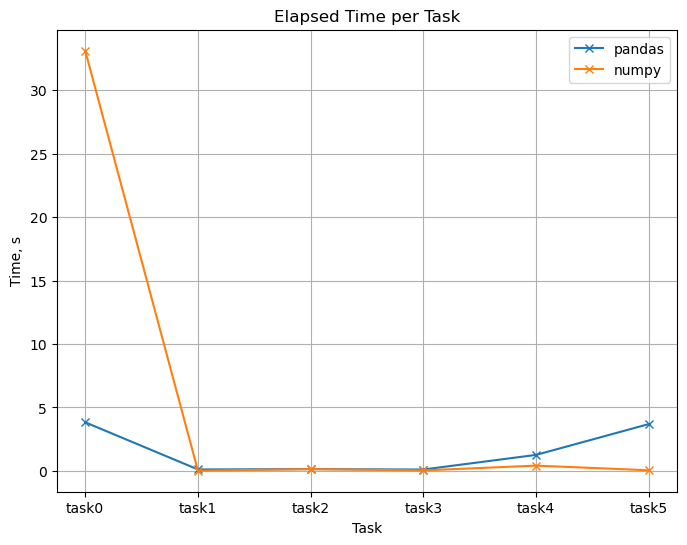

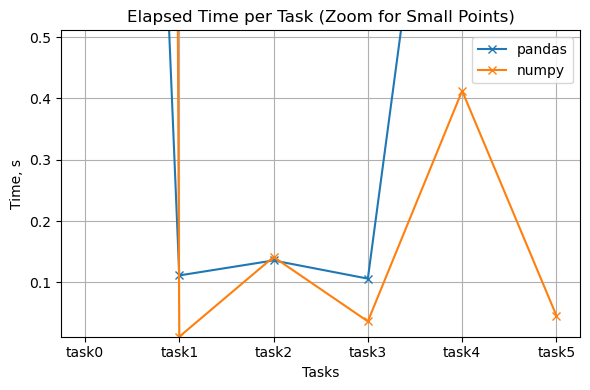

In [240]:

# main plot
plt.figure(figsize=(8,6))
for lib_name, tasks in TIMER.items():
    plt.plot(tasks.keys(), tasks.values(), marker='x', label=lib_name)

plt.ylabel('Time, s')
plt.title(f"Elapsed Time per Task")
plt.xlabel("Task")
plt.legend()
plt.grid(True)

# zoomed in plot for small numbers
plt.figure(figsize=(6,4))
for lib_name, tasks in TIMER.items():
    plt.plot(tasks.keys(), tasks.values(), marker='x', label=lib_name)

# calculating min value from all TIMER dict to set as Y bottom limit
bottom_threshold = min(value for lib in TIMER.values() for value in lib.values())

plt.ylim(bottom_threshold, bottom_threshold + 0.5)
plt.xlabel("Tasks")
plt.ylabel("Time, s")
plt.title("Elapsed Time per Task (Zoom for Small Points)")
plt.legend()
plt.grid(True)

plt.tight_layout()

In [ ]:
import seaborn as sns

pd_data['Time'] = pd.to_datetime(pd_data['Time'], format='%H:%M:%S')

df = pd_data[['Global_intensity', 'Global_active_power', 'Global_reactive_power']]
ax = sns.heatmap(df, annot=True)

plt.show()

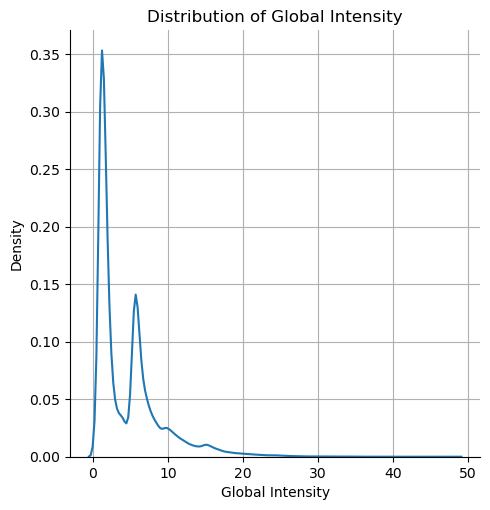

In [242]:
ax = sns.displot(pd_data['Global_intensity'], kind="kde")  # Adjust for other columns

# Customize the plot (optional)
plt.title("Distribution of Global Intensity")
plt.xlabel("Global Intensity")
plt.ylabel("Density")
plt.grid(True)
plt.show()

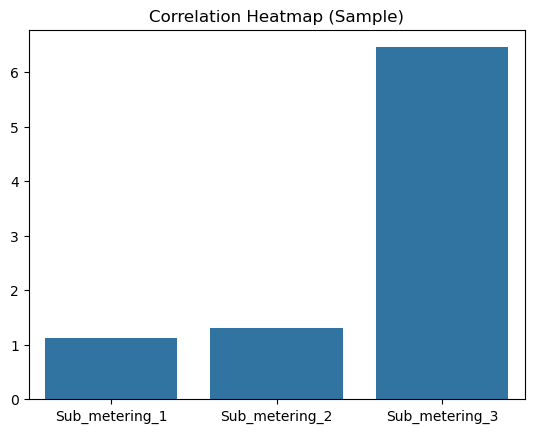

In [247]:
df = pd_data[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].mean()

sns.barplot(df)

# Customize the plot (optional)
plt.title("Correlation Heatmap (Sample)")
plt.show()